In [156]:
import numpy as np
import matplotlib.pyplot as plt

# Aufgabe 4 

In the following problem we consider the nonlinear System

\begin{align*}
\begin{cases}
e^{x_1^2 + x_2^2} - 1 = 0 \\
e^{x_1^2 - x_2^2} - 1 = 0
\end{cases}
\end{align*}

which has the solution $x^* = (0,0)$.

### Part a) (Simplified Newton's Method)

Implement the simplified Netons Method for the given sytem. The Jacobian of the Sytem can be calculated analytically or with finite differences.

#### Simplified Newton's Method

For this Newtons Method the Jacobian is calculated only once at the begining and then used for all iterations.

**Algorithm**

1. choose an initial guess $x^{(0)}$
2. Solve $f'(x^{(0)}) \Delta x^{(0)} = -f(x^{(0)})$ for $\Delta x^{(0)}$
3. Set $x^{(k+1)} = x^{(k)} + \Delta x^{(k)}$

We set our Fixed Point Iteration

\begin{align*}
\Phi(x) := x - [f'(x^{(0)})]^{-1} f(x)
\end{align*}

In [157]:
# System

def F(x):
    return np.array([np.exp(x[0]**2 + x[1]**2)-1, np.exp(x[0]**2 - x[1]**2)-1])

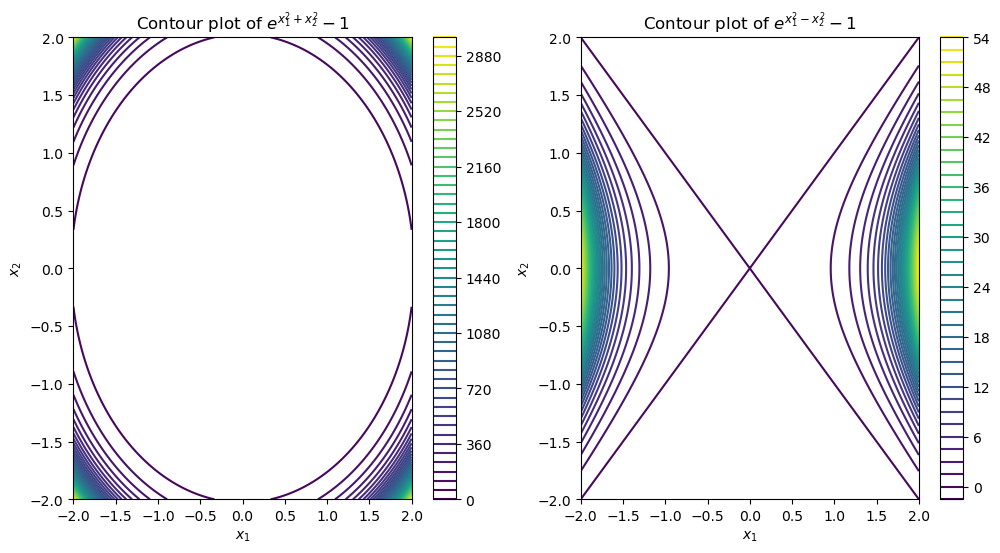

In [158]:
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

Z1 = np.exp(X**2 + Y**2) - 1
Z2 = np.exp(X**2 - Y**2) - 1

fig, ax = plt.subplots(1, 2, figsize=(12, 6))


# Contour Plot 1
contour1 = ax[0].contour(X, Y, Z1, levels=50, cmap='viridis')

ax[0].set_title('Contour plot of $e^{x_1^2 + x_2^2} - 1$')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
fig.colorbar(contour1, ax=ax[0])

# Contour Plot 2
contour2 = ax[1].contour(X, Y, Z2, levels=50, cmap='viridis')
ax[1].set_title('Contour plot of $e^{x_1^2 - x_2^2} - 1$')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
fig.colorbar(contour2, ax=ax[1])

plt.show()

# Analytical Jacobian

General form of the Jacobian is given by

\begin{align*}
J(x) = \begin{pmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2}
\end{pmatrix}
\end{align*}


The Jacobian of the System is given by



\begin{align*}
J(x) = \begin{pmatrix}
2 x_1 e^{x_1^2 + x_2^2} & 2 x_2 e^{x_1^2 + x_2^2} \\
2 x_1 e^{x_1^2 - x_2^2} & -2 x_2 e^{x_1^2 - x_2^2}
\end{pmatrix}
\end{align*}

In [159]:
def J(x):
    return np.array([[2*x[0]*np.exp(x[0]**2 + x[1]**2), 2*x[1]*np.exp(x[0]**2 + x[1]**2)],
                        [2*x[0]*np.exp(x[0]**2 - x[1]**2), -2*x[1]*np.exp(x[0]**2 - x[1]**2)]])



In [160]:
def simplified_newtons_method(x0, f, tol=1e-6):
    x = x0
    true_solution = np.array([0, 0])
    # Calculate Jacobian for Initial Guess
    Jx = J(x)
    # Track Iterations
    nit = 0
    err_k = [np.linalg.norm(x - true_solution)]
    while True:
        # Calculate F(x)
        Fx = f(x)
        # Solve for dx
        dx = np.linalg.solve(Jx, -Fx)
        # Update x
        x = x + dx

        # Calculate error to true sol.
        err_k.append(np.linalg.norm(x - true_solution))

        err_tol = np.linalg.norm(dx)
        nit += 1
        print(f'Iteration {nit}: x = {x}, err = {err_tol}')
        if err_tol < tol:
            break
    return x, err_k, nit

x0 = np.array([0.5, 0.5])
x,err_k,nit = simplified_newtons_method(x0, F)

Iteration 1: x = [0.3033 0.3033], err = 0.27822483870619413
Iteration 2: x = [0.242 0.242], err = 0.08660986414057423
Iteration 3: x = [0.2043 0.2043], err = 0.053304989385315735
Iteration 4: x = [0.1779 0.1779], err = 0.03735019873495623
Iteration 5: x = [0.1581 0.1581], err = 0.02803094208789784
Iteration 6: x = [0.1426 0.1426], err = 0.02198504359450563
Iteration 7: x = [0.13 0.13], err = 0.017790088299043723
Iteration 8: x = [0.1196 0.1196], err = 0.01473795315611214
Iteration 9: x = [0.1108 0.1108], err = 0.012436771444776298
Iteration 10: x = [0.1032 0.1032], err = 0.010652707650423343
Iteration 11: x = [0.0967 0.0967], err = 0.009238053859960587
Iteration 12: x = [0.091 0.091], err = 0.008095237502686268
Iteration 13: x = [0.0859 0.0859], err = 0.007157426471763883
Iteration 14: x = [0.0814 0.0814], err = 0.006377449437932367
Iteration 15: x = [0.0774 0.0774], err = 0.005721157966688469
Iteration 16: x = [0.0737 0.0737], err = 0.005163289052420166
Iteration 17: x = [0.0704 0.070

#### Normal Newton Method

For the normal Newton Method the Jacobian is calculated in every iteration.

**Algorithm**
1. choose an initial guess $x^{(0)}$
2. $\Delta x^{(k)} = -[f'(x^{(k)})]^{-1} f(x^{(k)})$
3. $x^{(k+1)} = x^{(k)} + \Delta x^{(k)}$

In [161]:
def newton_algorithm(x0,f, tol=1e-6,):
    """
    Implementation of the Newtons algorithm for the given sytem with
    calculation of the error and the number of iterations.
    """
    true_solution = np.array([0, 0])
    x = x0
    nit = 0
    err_k = [np.linalg.norm(x - true_solution)]


    while True:
        Fx = f(x)
        Jx = J(x)
        dx = np.linalg.solve(Jx, -Fx)
        x = x + dx
        # Calculate Error to True solution
        err_k.append(np.linalg.norm(x - true_solution))
        # Calculate the Error for Tolerance
        err_tol = np.linalg.norm(dx)
        nit += 1
        print(f'Iteration {nit}: x = {x}, err = {err_tol}')
        if err_tol < tol:
            break
    return x, err_k, nit

x0 = np.array([0.5, 0.5])
x, err_k, nit = newton_algorithm(x0, F)

print(err_k)

Iteration 1: x = [0.3033 0.3033], err = 0.27822483870619413
Iteration 2: x = [0.1648 0.1648], err = 0.19587446965846314
Iteration 3: x = [0.0846 0.0846], err = 0.1133975652054074
Iteration 4: x = [0.0426 0.0426], err = 0.0593791859638611
Iteration 5: x = [0.0213 0.0213], err = 0.03006080147496808
Iteration 6: x = [0.0107 0.0107], err = 0.015078096824367292
Iteration 7: x = [0.0053 0.0053], err = 0.007545052401640965
Iteration 8: x = [0.0027 0.0027], err = 0.003773278023626232
Iteration 9: x = [0.0013 0.0013], err = 0.0018867330311558178
Iteration 10: x = [0.0007 0.0007], err = 0.0009433782692785177
Iteration 11: x = [0.0003 0.0003], err = 0.00047169060394311625
Iteration 12: x = [0.0002 0.0002], err = 0.00023584548551084582
Iteration 13: x = [8.3384e-05 8.3384e-05], err = 0.00011792276587174217
Iteration 14: x = [4.1692e-05 4.1692e-05], err = 5.8961385681699936e-05
Iteration 15: x = [2.0846e-05 2.0846e-05], err = 2.9480693395120573e-05
Iteration 16: x = [1.0423e-05 1.0423e-05], err = 1

#### Convergence Plot

We define the error as

\begin{align*}
e^{(k)} = x^{(k)} - a
\end{align*}

where $a = (0,0)$ is the true solution. We plot number of iterations agains $log_{10}(||e^{(k)}||)$

In [162]:
# Initial point
x0 = np.array([0.5, 0.5])
# Vary this for plot

tol = 1e-2


x_newton, err_k_newton, nit_newton = newton_algorithm(x0, F,tol=tol)

# Simplified Newton
x_newton_simp, err_k_newton_simp, nit_newton_simp = simplified_newtons_method(x0, F, tol=tol)


Iteration 1: x = [0.3033 0.3033], err = 0.27822483870619413
Iteration 2: x = [0.1648 0.1648], err = 0.19587446965846314
Iteration 3: x = [0.0846 0.0846], err = 0.1133975652054074
Iteration 4: x = [0.0426 0.0426], err = 0.0593791859638611
Iteration 5: x = [0.0213 0.0213], err = 0.03006080147496808
Iteration 6: x = [0.0107 0.0107], err = 0.015078096824367292
Iteration 7: x = [0.0053 0.0053], err = 0.007545052401640965
Iteration 1: x = [0.3033 0.3033], err = 0.27822483870619413
Iteration 2: x = [0.242 0.242], err = 0.08660986414057423
Iteration 3: x = [0.2043 0.2043], err = 0.053304989385315735
Iteration 4: x = [0.1779 0.1779], err = 0.03735019873495623
Iteration 5: x = [0.1581 0.1581], err = 0.02803094208789784
Iteration 6: x = [0.1426 0.1426], err = 0.02198504359450563
Iteration 7: x = [0.13 0.13], err = 0.017790088299043723
Iteration 8: x = [0.1196 0.1196], err = 0.01473795315611214
Iteration 9: x = [0.1108 0.1108], err = 0.012436771444776298
Iteration 10: x = [0.1032 0.1032], err = 0.

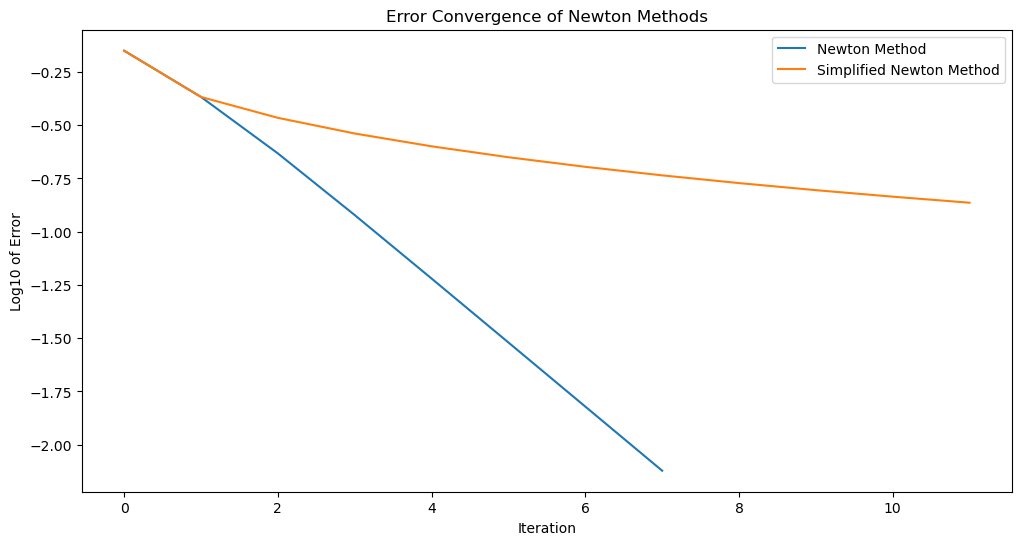

In [163]:
# Take Log10 of norm of error

err_k_log_newton = np.log10(err_k_newton)
err_k_log_newton_simp = np.log10(err_k_newton_simp)



# Plot 

plt.figure(figsize=(12, 6))
plt.plot(err_k_log_newton, label='Newton Method')
plt.plot(err_k_log_newton_simp, label='Simplified Newton Method')
plt.xlabel('Iteration')
plt.ylabel('Log10 of Error')
plt.title('Error Convergence of Newton Methods')
plt.legend()
plt.show()


### Part b) Convergence Improvment Through Epsilon Algorithm

Improve the Convergence of the Simplified Newton Method by using the Epsilon Algorithm


#### Epsilon Algorithm

Let $\{S_1,S_2,S_3...\}$ be a sequence. For $n \geq 1$ we define

\begin{align*}
\epsilon_{-1}^{(n)}:= 0 ~  \epsilon_0^{(n)} := S_n ~ \epsilon_{k+1}^{(n)} := \epsilon_{k-1}^{(n+1)} + \frac{1}{\epsilon_k^{(n+1)} - \epsilon_{k}^{(n)}}
\end{align*}

Then we have $\epsilon_2^{(n)}= S', \epsilon_4^{(n)} = S'' ...$ 

In [164]:
def epsilon_algorithm(S):
    n = len(S)
    epsilon = np.zeros((n, n))
    epsilon[:, 0] = S
    for k in range(1, n):
        for i in range(n - k):
            epsilon[i, k] = epsilon[i + 1, k - 1] + 1 / (epsilon[i + 1, k] - epsilon[i, k - 1])
    return epsilon

In [165]:
S = np.array(err_k_newton_simp)
S_epsilon = epsilon_algorithm(S)


In [166]:
# Select all the Second Rows

S_epsilon = S_epsilon[:,::2]
print(S_epsilon)

[[ 0.7071 -0.9745 -1.4537 -2.5072 -3.464  -4.375 ]
 [ 0.4289 -2.13   -2.6618 -3.3965 -4.2102 -5.0547]
 [ 0.3423 -2.8291 -3.3895 -4.0921 -4.8675  0.    ]
 [ 0.289  -3.4391 -4.0233 -4.7179 -5.4761  0.    ]
 [ 0.2516 -4.0043 -4.6088 -5.303   0.      0.    ]
 [ 0.2236 -4.5423 -5.1642 -5.8611  0.      0.    ]
 [ 0.2016 -5.0619 -5.6988  0.      0.      0.    ]
 [ 0.1838 -5.5683 -6.2182  0.      0.      0.    ]
 [ 0.1691 -6.0646  0.      0.      0.      0.    ]
 [ 0.1566 -6.553   0.      0.      0.      0.    ]
 [ 0.146   0.      0.      0.      0.      0.    ]
 [ 0.1367  0.      0.      0.      0.      0.    ]]


[-0.9745 -2.13   -2.8291 -3.4391 -4.0043 -4.5423 -5.0619 -5.5683 -6.0646
 -6.553 ]
[-1.4537 -2.6618 -3.3895 -4.0233 -4.6088 -5.1642 -5.6988 -6.2182]


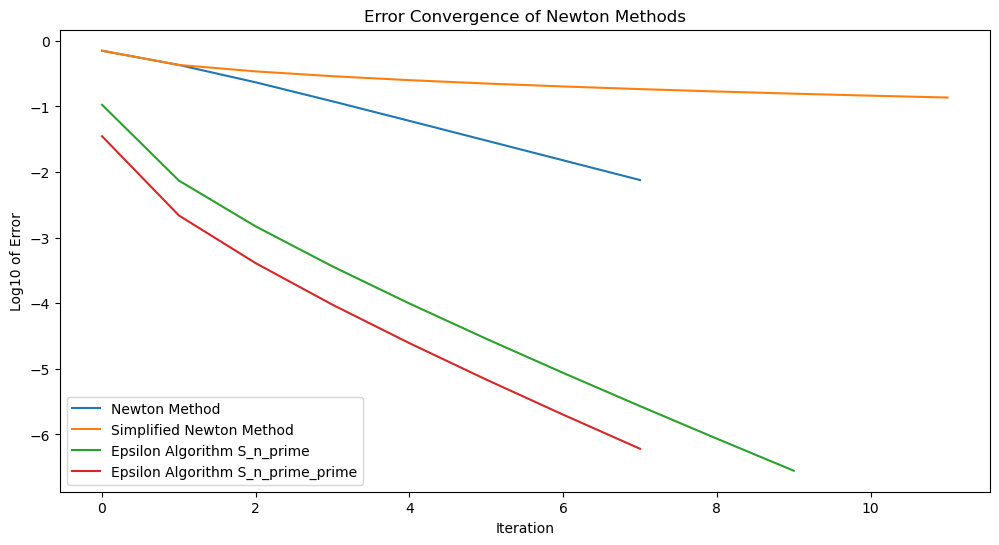

In [167]:
# Plot Newton, Simplified Netwon and Epsilon Algorithm

S_n_prime = S_epsilon[:,1]
# Drop all the Zeros
S_n_prime = S_n_prime[S_n_prime != 0]
S_n_prime_prime = S_epsilon[:,2]
S_n_prime_prime = S_n_prime_prime[S_n_prime_prime != 0]

print(S_n_prime)
print(S_n_prime_prime)

plt.figure(figsize=(12, 6))
plt.plot(err_k_log_newton, label='Newton Method')
plt.plot(err_k_log_newton_simp, label='Simplified Newton Method')
plt.plot(S_n_prime, label='Epsilon Algorithm S_n_prime')
plt.plot(S_n_prime_prime, label='Epsilon Algorithm S_n_prime_prime')
plt.xlabel('Iteration')
plt.ylabel('Log10 of Error')
plt.title('Error Convergence of Newton Methods')
plt.legend()
plt.show()

### Part c) Broyden's Method

A shortcoming of the Newtons's Method for nonlinear equations is that the derivatives required for the Jacobian are difficult, expensive to calculate.

**Secant Methods** known as quasi-newton methods, do not require the calculation of the Jacobian. They construct and approximation to the matrix.

Let $B_k$ be Jacobian approximation at the $k$-th iteration. Let $s_k = x_{k+1} - x_k$. Then the ubdated Jacobian $B_{k+1}$ must satisfy the secant equation

$B_{k+1}s_k = f(x_{k+1}) - f(x_k)$

Given a Initial Matrix $B_0$ obtained by finite differences, Broydens method generates subsequent matrices by update formula

\begin{align*}
B_{k+1} = B_k + \frac{(y_k - B_k s_k)s_k^T}{||s_k||^2_2}
\end{align*}

where $y_k = f(x_{k+1}) - f(x_k)$

Remember finite differences

\begin{align*}
\frac{\partial f_i}{\partial x_j} \approx \frac{f_i(x + \epsilon e_j) - f_i(x)}{\epsilon}
\end{align*}

In [179]:

def finite_difference_jacobian(f, x, h=1e-5):
    """
    Calculates the Jacobian of a Function using finite differences
    """

    n = len(x) # Variables
    m = len(f(x)) # Functions
    J = np.zeros((m,n))
    for j in range(n):
        # Perturb the j_th component of x
        x_perturbed = x.copy()
        x_perturbed[j] += h
        # Calculate the Finite Difference
        J[:, j] = (f(x_perturbed) - f(x)) / h
    return J


def broyden_method(x0, f, tol=1e-7, max_iter=100):
    """
    Implementation of Broyden's method for solving nonlinear equations.
    """
    true_solution = np.array([0, 0])
    x = x0
    nit = 0
    err_k = [np.linalg.norm(x - true_solution)]
    # Initial Guess with Finite Differences
    B_k = finite_difference_jacobian(f, x)
    while True: 
        Fx = F(x)
        dx = np.linalg.solve(B_k, -Fx)
        # Update x
        x_new = x + dx
        # Calculate Error to True solution
        err_k.append(np.linalg.norm(x - true_solution))
        # Calculate the Error for Tolerance
        err_tol = np.linalg.norm(dx)
        nit += 1
        
        # Update Broyden Matrix
        Fx_new = F(x_new)
        y = Fx_new - Fx
        s = x_new - x
        
        # Use outer product for update
        B_k = B_k + np.outer(y - np.dot(B_k, s), s) / np.linalg.norm(s)**2

        x = x_new
        print(f'Iteration {nit}: x = {x}, err = {err_tol}')
        if err_tol < tol:
            break
        if nit > max_iter:
            break
    return x, err_k, nit, B_k

        



x0 = np.array([0.5, 0.5])
x, err_k, nit, B_k = broyden_method(x0, F)

print(B_k)

Iteration 1: x = [0.3033 0.3033], err = 0.278220665368607
Iteration 2: x = [0.2143 0.2143], err = 0.12575947972588833
Iteration 3: x = [0.1334 0.1334], err = 0.11449491564426702
Iteration 4: x = [0.0845 0.0845], err = 0.0691019830360526
Iteration 5: x = [0.0523 0.0523], err = 0.04554519670166505
Iteration 6: x = [0.0325 0.0325], err = 0.028084430789965885
Iteration 7: x = [0.0201 0.0201], err = 0.017525690702909623
Iteration 8: x = [0.0124 0.0124], err = 0.010828206902899025
Iteration 9: x = [0.0077 0.0077], err = 0.006701686047572435
Iteration 10: x = [0.0047 0.0047], err = 0.004141690350174983
Iteration 11: x = [0.0029 0.0029], err = 0.0025602348167445216
Iteration 12: x = [0.0018 0.0018], err = 0.0015823021591825771
Iteration 13: x = [0.0011 0.0011], err = 0.0009779460244574642
Iteration 14: x = [0.0007 0.0007], err = 0.000604403327138138
Iteration 15: x = [0.0004 0.0004], err = 0.00037354344489020725
Iteration 16: x = [0.0003 0.0003], err = 0.00023086251586623525
Iteration 17: x = 

In [180]:

J_analytical = J(np.array([0, 0]))

print("Analytical Jacobian at (0,0):")
print(J_analytical)

print("\nFinal Broyden Jacobian:")
print(B_k)


difference = np.linalg.norm(J_analytical - B_k)
print("\nDifference between analytical and Broyden Jacobian:")
print(difference)

Analytical Jacobian at (0,0):
[[0. 0.]
 [0. 0.]]

Final Broyden Jacobian:
[[-1.5911e-06  1.9111e-06]
 [ 1.0000e+00 -1.0000e+00]]

Difference between analytical and Broyden Jacobian:
1.4142277045351364


# Exercise 5

Implement the Gauß-Newton Method. Import the File population.csv and temperature.csv and use the Gauß-Newton Method to fit the following model functions

**Population Model**

\begin{align*}
\Phi(x,t) = x_1 e^{x_2t}
\end{align*}

**Temperature Model**

\begin{align*}
\Phi(x,t) = x_1 *sin(x_2t + x_3) + x_4
\end{align*}

## Part a)

Calculate the parameters x for both models with different starting values. How sensible is the method on different starting values.

+ Represent this Visually
+ Starting Values for population $x=(6,0,3), temperature: $x=(17,0.5,10.5,77)$


### Short Theory Intoduction

Given $m$ functions $r=(r_1,...,r_m)$ and n variables $\beta= (\beta_1,...,\beta_n)$, the Gauss-Newton Method is used to minimize the sum of squares of the residuals.

\begin{align*}
S(\beta) = \sum_{i=1}^m r_i^2(\beta)
\end{align*}

We start with an initial guess $\beta^{(0)}$ and then iterate

\begin{align*}
\beta^{(k+1)} = \beta^{(k)} - (J_r^TJ_r)^{-1}J_r^Tr(\beta^{(s)})
\end{align*}

where the Jacobian matrices are given by

\begin{align*}
(J_r)_{ij} = \frac{\partial r_i(\beta^{(s)})}{\partial \beta_j}
\end{align*}

So basically the update $\Delta = \beta^{(s+1)} - \beta^{(s)}$ is given by

\begin{align*}
\Delta = (J_r^TJ_r)^{-1}J_r^Tr(\beta^{(s)})
\end{align*}

We can basically make a matrix equation

+ A = $J_r^TJ_r$
+ b = $-J_r^T r(\beta^{(s)})$

Then we solve the equation $A\Delta = b$ for $\Delta$

In [181]:
# Define Model

def population_model(x,t):
    return x[0]*np.exp(x[1]*t)

def temperature_model(x,t):
    return x[0]*np.sin(x[1]*t+x[2])+x[3]

In [182]:
# Define residuals

def residuals_population(x,t,y):
    return y - population_model(x,t)

def residuals_temperature(x,t,y):
    return y - temperature_model(x,t)


In [183]:
# Define Jacobians

def J_population(x,t):
    df_dx1 = np.exp(x[1]*t)
    df_dx2 = x[0]*t*np.exp(x[1]*t)
    return np.column_stack((df_dx1, df_dx2))

def J_temperature(x,t):
    df_dx1 = np.sin(x[1]*t + x[2])
    df_dx2 = x[0]*t*np.cos(x[1]*t+x[2])
    df_dx3 = x[0]*np.cos(x[1]*t+x[2])
    df_dx4 = 1
    return np.column_stack((df_dx1, df_dx2, df_dx3, df_dx4))

In [184]:
# Make Gauß-Newtons Method

def gauss_newton(x0,t,y,model,residuals,jacobian,tol=1e-6,max_iter=100):
    x = x0 # Inital
    for i in range(max_iter):
        r = residuals(x,t,y)
        J = jacobian(x,t)
        delta_x = np.linalg.lstsq(J.T@J,J.T@r, rcond=None)[0]
        x = x + delta_x
        if np.linalg.norm(delta_x) < tol:
            break
    else:
        print("Maximum Iterations")
    return x